# Visualising and understanding file data

In [1]:
from media_tools import *
import numpy as np
sample_media = "C:/Users/pdazeley-gaist23/PycharmProjects/Image_and_Audio_Generation_and_Editing_using_Python/sample_media/"

## Image file data:
Reading image file data using the `image tools` module's `read_image(path)` function returns a numpy array of image rows
where each row is an array of pixel colour/shade values. Typically,  each colour/shade value is an array of 3 values between
0 and 255 for blue, green, and red if the image is in colour, or a single value between 0 and 255 for an image is greyscale.

**Example 1: 3x3 colour image array:**

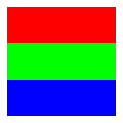

In [2]:
# Each image row contains [red, green, and blue] (RBG) values for each pixel in the row.

image = np.uint8([
    [[255,0,0], [255,0,0], [255,0,0]], # image row 1
    [[0,255,0], [0,255,0], [0,255,0]], # image row 2
    [[0,0,255], [0,0,255], [0,0,255]]  # image row 3
])

image_tools.show_image(image, axis=False, scale_ratio=.5)

**Note:** the array is an array of unsigned 8-bit integers (0 to 255) specified using the command `np.uint8()` to create
the numpy array.

**Example 2: 3x3 greyscale image array:**

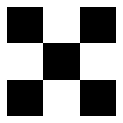

In [3]:
image = np.uint8([
    [0, 255, 0],
    [255, 0, 255],
    [0, 255, 0]
])

image_tools.show_image(image, axis=False, scale_ratio=.5)

### Reading the shape of an image:
To get the height, width, and number of channels of an image file, we can read the shape of the image array.

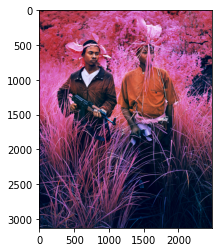

Image height: 3130 pixels
Image width: 2480 pixels
Number of channels: 3


In [4]:
# Read the image
image = image_tools.read_image(sample_media+"Mosse_2012_Hot_Rats.jpg")

# Show the image
image_tools.show_image(image, scale_ratio=1)

# Get the image dimensions
height, width, channels = image.shape

print("Image height:", height,"pixels")
print("Image width:", width, "pixels")
print("Number of channels:", channels)

### Getting data from individual image channels:
We can extract image channel data from an image array by slicing the channel data out of the source image array.

In [5]:
# Get each image channel separately
red_channel = image[:,:,0]
green_channel = image[:,:,1]
blue_channel = image[:,:,2]

### Visualising image channels:
We can show each channel of an image by calling the `image_tools` module's `show_image(image_data)` function for the image
channel data like so:

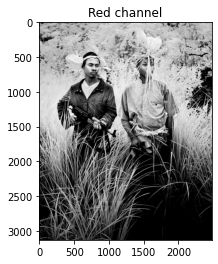

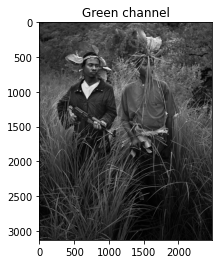

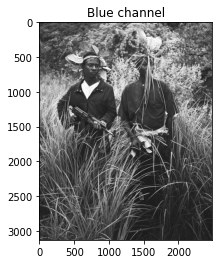

In [6]:
image_tools.show_image(red_channel, title="Red channel", scale_ratio=1)
image_tools.show_image(green_channel, title="Green channel", scale_ratio=1)
image_tools.show_image(blue_channel, title="Blue channel", scale_ratio=1)

We can also show each of these channels in colour by creating an empty array in the shape of the source image and assigning
the colour channel data to the appropriate colour channel in the empty array based on the index of the channel in the source
image.

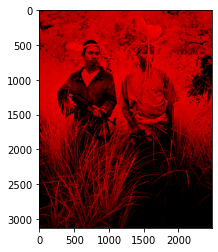

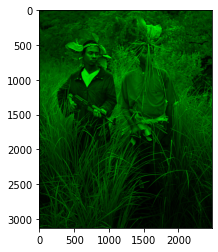

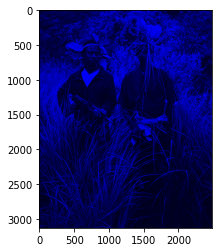

In [7]:
# Create empty image arrays with the shape of the source image
blue_image = np.zeros(image.shape).astype(np.uint8)
green_image = np.zeros(image.shape).astype(np.uint8)
red_image = np.zeros(image.shape).astype(np.uint8)

# Assign the channel data to the appropriate channel in the empty image arrays based on the channel's index in the source image
red_image[:,:,0] = red_channel
green_image[:,:,1] = green_channel
blue_image[:,:,2] = blue_channel

# Show the images of each channel in colour
image_tools.show_image(red_image, scale_ratio=1)
image_tools.show_image(green_image, scale_ratio=1)
image_tools.show_image(blue_image, scale_ratio=1)

## Audio file data:
Reading audio file data using the `audio tools` module's `read_audio(path, mono)` function returns a floating point time
series of amplitude values for mono audio data, and an array of floating point time series of amplitude values for stereo data.

Take a moment to appreciate the wonderful simplicity of audio files. I always instinctively thought they would be very
complicated, but no; just essentially a list (or more than one list, typically a couple for stereo files) of amplitude values and a
sample rate.

### Mono data:

In [8]:
mono_data, sample_rate = audio_tools.read_audio(sample_media+"stereo_sample.wav", mono=True)
mono_data

array([-1.4901807e-04, -5.3357369e-05, -2.8748254e-04, ...,
       -2.9347420e-03, -3.2026717e-03, -3.5734070e-03], dtype=float32)

### Stereo data:

In [9]:
stereo_data = audio_tools.read_audio(sample_media+"stereo_sample.wav", mono=False)[0]
stereo_data

array([[-2.9890225e-04, -1.0479891e-04, -5.8222032e-04, ...,
        -2.9425984e-03, -3.2003042e-03, -3.5893652e-03],
       [ 8.6623123e-07, -1.9157633e-06,  7.2549947e-06, ...,
        -2.9268856e-03, -3.2050386e-03, -3.5574494e-03]], dtype=float32)

### Understanding oscillograms and spectrograms:

**Oscillograms/waveform graphs:** Graphs of the amplitude of a wave over time. They convey amplitude and frequency
information, although the frequency information is not usually immediately readable from the graph, and requires
calculation to be retrieved for any segment of time.

The `media_tools.audio_tools` module's `plot_waveform(audio_data, sample_rate)` function uses the `librosa.display` module's `waveshow()` function. For more
information about oscillograms in `librosa`, see [this link](https://librosa.org/doc/main/generated/librosa.display.waveshow.html#librosa.display.waveshow).

**Oscillogram examples:**

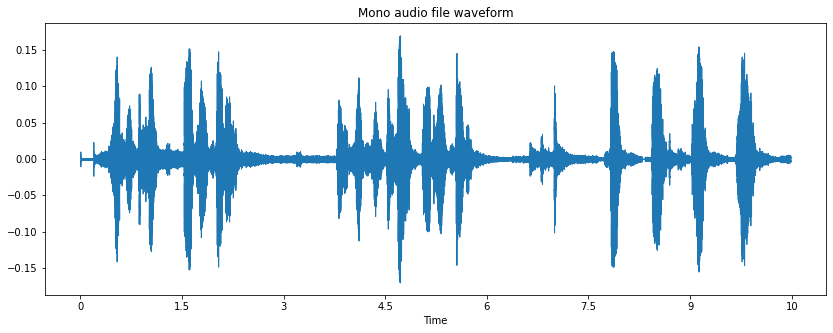

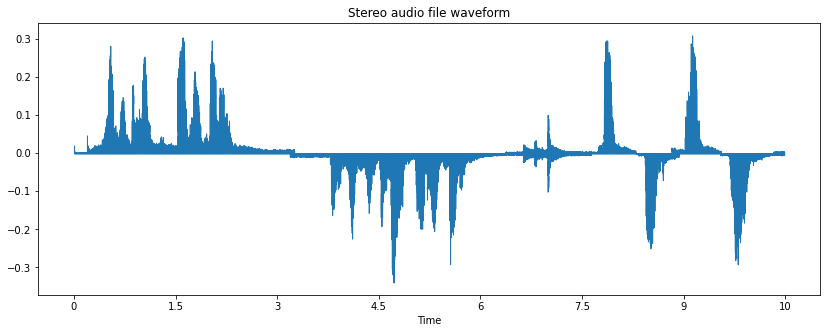

In [10]:
# Plot a waveform of the mono data
audio_tools.plot_waveform(mono_data, sample_rate, title="Mono audio file waveform")

# Plot a waveform of the stereo data
audio_tools.plot_waveform(stereo_data, sample_rate, title="Stereo audio file waveform")

**Spectrograms:** Spectrograms are heatmaps of the frequencies (Hz) in a signal over time (s), and their
amplitude/volume (dB scale represented using colour and brightness). On the volume scale of a histogram, the highest volume value is mapped to
0 dB, and smaller volume values get mapped to negative decibel values.

The `media_tools.audio_tools` module's `plot_spectrogram(audio_data, sample_rate)` function uses the `librosa.display`
module's `specshow()`, `stft()`, and `amplitude_to_db()` functions. For more information about spectrograms in librosa,
see [this link](https://librosa.org/doc/main/auto_examples/plot_display.html).

**Note:** Spectrograms map information from individual audio signals; they can only be used to plot a single audio signal
at a time. To plot audio data from a stereo audio file, the best approaches are either to plot two spectrogram figures,
or to convert the stereo data to mono data, for example, using `librosa`'s [`to_mono(data)`](https://librosa.org/doc/main/generated/librosa.to_mono.html)
function.

**Spectrogram examples:**

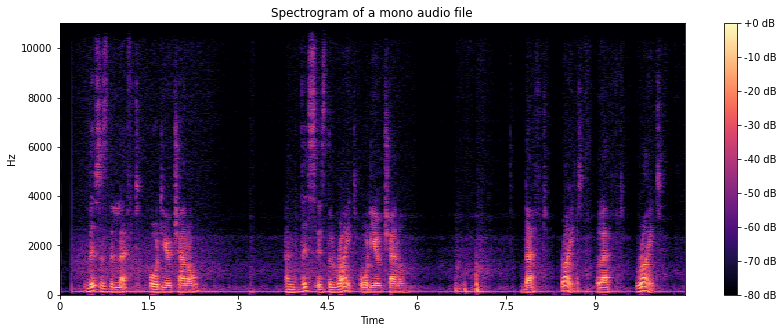

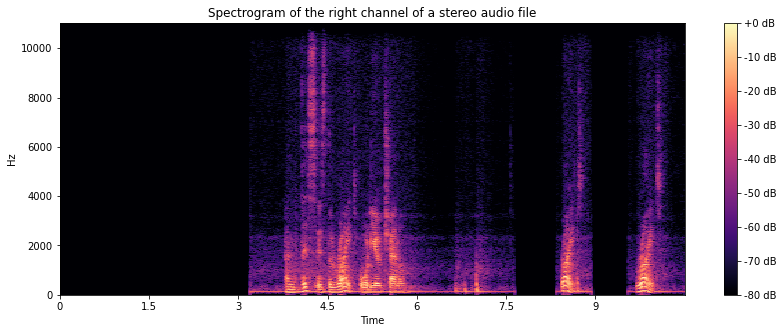

In [11]:
# Plot a spectrogram of the mono data
audio_tools.plot_spectrogram(mono_data, sample_rate, title="Spectrogram of a mono audio file")

# Plot a spectrogram of the right channel of the stereo data
audio_tools.plot_spectrogram(stereo_data[1], sample_rate, title="Spectrogram of the right channel of a stereo audio file")

## Video file data:

In the `media_tools` package, reading a video file using the `video_tools` module's `read_video(path)` function returns an array containing an array
of image arrays, and a framerate value.

To get audio data from a video file, you can use the `save_audio_from_video(video_path, audio_save_path)` function of the `video tools`
module, and load the audio data from the newly generated audio file.

**Example video image data:**

In [13]:
clip, fps = video_tools.read_video(sample_media+"sample_video.mp4", video_as_array=True)
clip

array([[[[ 57,   2,  27],
         [ 57,   2,  27],
         [ 54,   3,  30],
         ...,
         [120, 101,  83],
         [118,  99,  79],
         [117,  98,  78]],

        [[ 59,   4,  29],
         [ 59,   4,  29],
         [ 56,   5,  32],
         ...,
         [120, 101,  83],
         [119, 100,  80],
         [118,  99,  79]],

        [[ 62,  11,  37],
         [ 61,  10,  36],
         [ 58,  10,  36],
         ...,
         [121, 101,  86],
         [120, 100,  85],
         [119,  99,  84]],

        ...,

        [[ 41,  14,  43],
         [ 41,  14,  43],
         [ 42,  14,  40],
         ...,
         [252, 255, 255],
         [252, 255, 255],
         [252, 255, 255]],

        [[ 41,  14,  41],
         [ 41,  14,  41],
         [ 41,  15,  38],
         ...,
         [252, 255, 255],
         [252, 255, 255],
         [252, 255, 255]],

        [[ 41,  14,  41],
         [ 41,  14,  41],
         [ 41,  15,  38],
         ...,
         [252, 255, 255],
        

**Example video sound data** (it's just good ol' audio data)**:**

In [14]:
video_tools.save_audio_from_video(sample_media+"sample_video.mp4", sample_media+"example_audio_from_video.wav")
clip_audio, clip_sr = audio_tools.read_audio(sample_media+"example_audio_from_video.wav")
clip_audio

MoviePy - Writing audio in C:/Users/pdazeley-gaist23/PycharmProjects/Image_and_Audio_Generation_and_Editing_using_Python/sample_media/example_audio_from_video.wav


MoviePy - Done.


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.2612471e-05,
        3.2853452e-05, 5.5928736e-05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.2612471e-05,
        3.2853452e-05, 5.5928736e-05]], dtype=float32)

### Viewing video data:
You can view video data using the `media_tools` package in a variety of ways, but in most cases (with the exception of
viewing frames from a video image array), you will have to save the video as a file before doing so.

- You can preview small video files in Jupyter notebooks using the `video_tools` module's `play_from_file(path)` function.

- You can open larger video files using the default operating system specified software using the `video_tools` module's
`open_video_os_default(path)` function.

- You can preview individual frames from a video, or audio from a video-derived audio file using the `image_tools` and
`audio_tools` modules' functions.

In [15]:
# preview the video in Jupyter notebook (the example video is too large to do this)
video_tools.play_from_file(sample_media+"sample_video.mp4")

# open the video file using the default program
video_tools.open_video_os_default(sample_media+"sample_video.mp4")

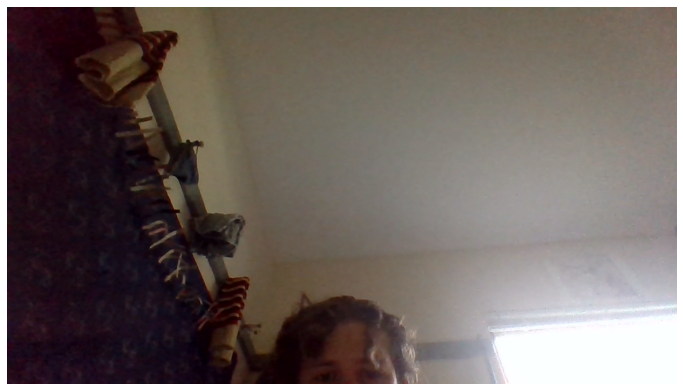

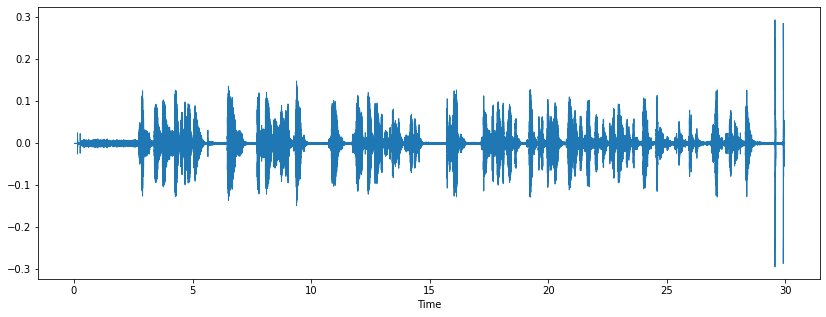

In [16]:
# view a frame from the video image array
image_tools.show_image(clip[1], axis=False)

# view the oscillogram of the video-derived audio file
audio_tools.plot_waveform(clip_audio, clip_sr)